**神经网络（Neural Network）** 指的是一种特定类型的假设函数，它由 **多个参数化的、可微分的函数（也称为“层”）组合而成，用于形成输出**。

这个术语源自生物学的启发，但实际上只要符合上述类型的任何假设函数，都可以被称为神经网络，和生物学关联不大

神经网络是深度学习的核心。它们用途广泛、功能强大且可扩展，使其非常适合处理大型和高度复杂的机器学习任务，例如对数十亿个图像进行分类（例如Google Images），为语音识别服务提供支持，每天向成千上万的用户推荐（例如抖音）观看的最佳视频，或学习在围棋游戏（DeepMind的AlphaGo）中击败世界冠军。

学习顺序：浏览下最简单的神经网络，然后到多层感知机，之后通过Tensorflow的Keras API实现神经网络

## 神经网络的发展过程

1. 人工神经网络已经存在很长一段时间了：它们于1943首次提出，该模型计算了生物神经元如何在动物大脑中协同工作，利用命题逻辑进行复杂的计算。这是第一个人工神经网络架构。从那时起，许多其他架构被发明出来。

2. 人工神经网络的早期成功导致人们普遍相信，我们很快将与真正的智能机器进行对话。当在20世纪60年代人们清楚地知道不能兑现这一承诺（至少相当长一段时间）时，资金流向了其他地方，人工神经网络进入了漫长的冬天。

3. 在20世纪80年代初期，发明了新的架构，并开发了更好的训练技术，从而激发了人们对连接主义（神经网络的研究）的兴趣。但是进展缓慢。

4. 到了20世纪90年代，发明了其他强大的机器学习技术，例如支持向量机。这些技术提供了似乎比人工神经网络更好的结果和更坚实的理论基础，神经网络的研究再次被搁置。

5. 现在目睹了对人工神经网络的另一波兴趣。这波浪潮会像以前一样消灭吗？这里有一些充分的理由使我们相信这次是不同的，人们对人工神经网络重新充满兴趣将对我们的生活产生更深远的影响：
    - 现在有大量数据可用于训练神经网络，并且在非常大和复杂的问题上，人工神经网络通常优于其他机器学习技术。
    - 自20世纪90年代以来，计算能力的飞速增长使得现在有可能在合理的时间内训练大型神经网络。这部分是由于摩尔定律（集成电路中的器件数量在过去的50年中，每两年大约增加一倍）这还要归功于游戏产业——刺激了数百万计强大的GPU卡的生产。此外，云平台已使所有人都可以使用这个功能。
    - 训练算法已得到改进。它们与20世纪90年代使用的略有不同，但是这些相对较小的调整产生了巨大的积极影响。
    - 在实践中，人工神经网络的一些理论局限性被证明是良性的。例如，许多人认为ANN训练算法注定要失败，因为它们可能会陷入局部最优解，但事实证明这在实践中并不是一个大问题，尤其是对于较大的神经网络：局部最优解通常表现得几乎与全局最优解一样好。
    - 人工神经网络似乎已经进入了资金和发展的良性循环。基于人工神经网络的好产品会成为头条新闻，这吸引了越来越多的关注和资金，从而带来了越来越多的进步甚至产生了惊人的产品。

## 感知机

感知机是最简单的神经网络架构，于 1957 年发明。它称为阈值逻辑单元（Threshold Logic Unit，TLU），有时也称为线性阈值单元（Linear Threshold Unit，LTU）。输入和输出是数字（而不是二进制开/关值），并且每个输入连接都与权重相关联。TLU 首先计算其输入的线性函数：

$$z = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b = \mathbf{w}^T \mathbf{x} + b.$$

然后它对结果应用阶跃函数：

$$h_w(x) = \text{step}(z).$$

所以它几乎与逻辑回归一样，只是它使用阶跃函数而不是sigmoid函数。就像在逻辑回归中一样，模型参数是输入权重 $\mathbf{w}$ 和偏置项 $b$。

![TLU单元](./images/neural_network/p1.png)

感知机中最常用的阶跃函数是 Heaviside 阶跃函数。有时使用符号函数代替。

**公式：感知机中使用的常见阶跃函数（假设阈值 = 0）**

$$
\text{heaviside}(z) =
\begin{cases}
0, & z < 0 \\
1, & z \ge 0
\end{cases}
\qquad
\text{sgn}(z) =
\begin{cases}
-1, & z < 0 \\
0, & z = 0 \\
+1, & z > 0
\end{cases}
$$

单个 TLU 可用于简单的线性二元分类。它计算其输入的线性函数，如果该结果大于阈值，则输出正类；否则，它输出负类。

有点像逻辑回归 或线性 SVM 分类。例如，可以使用单个 TLU 根据花瓣长度和宽度对鸢尾花进行分类。训练这样的 TLU 需要求出 $w_1、w_2$ 和 $b$ 的正确值（训练算法将在稍后讨论）。


 感知机由一个或多个组织在单层中的TLU组成，其中每个TLU都连接到每个输入。这样的层称为全连接层，或密集层。这些输入构成输入层。由于TLU层产生最终输出，因此称为输出层。例如，具有两个输入和三个输出的感知机如下图所示：

![两个输入神经元和三个输出神经元的感知机](./images/neural_network/p2.png)

这个感知机可以同时将实例分类为三个不同的二元类，这使它成为一个多标签分类器。它也可以用于多类分类。

借助线性代数，下面公式 可用于同时针对多个实例有效地计算一层人工神经元的输出。

**公式：计算全连接层的输出**

$$
h_{\mathbf{w}, b}(\mathbf{X}) = \phi(\mathbf{XW} + \mathbf{b})
$$

其中：
- $\mathbf{X}$ 代表输入特征的矩阵。每个实例一行，每个特征一列。
- 权重矩阵 $\mathbf{W}$ 包含所有连接权重。每个输入一行，每个神经元一列。

- 偏置向量 $\mathbf{b}$ 包含所有偏置项：每个神经元一个。

- 函数 $\phi$ 称为激活函数：当神经元是 TLU 时，它是阶跃函数（后面会讨论其他激活函数）。



## 感知机的训练

感知机一次被送入一个训练实例，并且针对每个实例进行预测。对于产生错误预测的每个输出神经元，它会增强来自输入的连接权重，这些权重有助于正确的预测。这个规则公式如下：

**公式：感知机学习规则（权重更新）**

$$
w_{i,j}^{\text{下一步}} = w_{i,j} + \eta (y_j - \hat{y}_j) x_i
$$

其中：
- $w_{i,j}$ 是第 $i$ 个输入和第 $j$ 个神经元之间的连接权重。
- $x_i$ 是当前训练实例的第 $i$ 个输入值。
- $\hat{y}_j$ 是当前训练实例的第 $j$ 个输出神经元的输出。
- $y_j$ 是当前训练实例的第 $j$ 个输出神经元的目标输出。
- $\eta$ 是学习率

每个输出神经元的决策边界都是线性的，因此感知机无法学习复杂的模式（和逻辑回归很像）；但如果训练实例是线性可分离的，这个算法会收敛到一个解

In [55]:
import keras
# Scikit-Learn的 Perceptron类
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

print(per_clf.coef_, per_clf.intercept_)
X_new = [[2,0.5],[3,1]]
y_pred = per_clf.predict(X_new)
y_pred

[[-1.4 -2.2]] [4.]


array([ True, False])

In [58]:
# 练习： 自己实现一下（numpy) 感知机的训练，就用上面代码的数据集
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)


# 训练过程
np.random.seed(42)
w = np.random.rand(2)
b = np.random.rand()
eta = 0.1
epoches = 20


for _ in range(epoches):
    for i in range(X.shape[0]):
        y_real = y[i]
        y_pred = 1 if np.dot(w, X[i]) + b >= 0 else 0

        w = w + eta * (y_real - y_pred) * X[i]
        b   = b + eta*(y_real - y_pred)

In [59]:
print(w, b)
X_new = [[2,0.5],
         [3,1]]

print(X_new @ w + b  >= 0)

from sklearn.metrics import accuracy_score
accuracy_score(X@w + b >=0, y)

[-0.50545988  0.50071431] 0.931993941811405
[ True False]


1.0

感知机有严重缺陷，特别是它们无法解决一些微不足道的问题［例如，异或(XOR)分类问题］。任何其他线性分类模型（例如逻辑回归分类器）都是如此

![XOR分类问题](./images/neural_network/p3.png)

可以通过堆叠多个感知机来消除感知机的局限性，得出来的神经网络叫多层感知机。 MLP(Multi Layer Perceptron)可以解决异或问题：可以把值(0,0),(0,1),(1,0),(1,1)代入下图验证：

![XOR的MLP](./images/neural_network/p4.png)

In [4]:
# 随堂练习：使用Numpy模拟这个感知机，并测试4个输入：(0,0),(0,1),(1,0),(1,1)
import numpy as np

def step(z):  # 阶跃函数
    # 实现阶跃函数
    return np.where(z >=0, 1, 0)


def mlp_xor(X):
    # 按图片给定的权重，实现两层感知机

    # 第一层
    W1 = np.ones((2,2))
    b1 = np.array([[-1.5, -0.5]])
    z1 = step(X@W1 + b1)  # shape: (m,2)

    # 第二层
    W2 = np.array([-1,1]).reshape(2,1)
    b2= -0.5
    z2 = step(z1 @W2 + b2)

    return z2



# 测试 4 个输入
X = np.array([[0,0],[1,0],[0,1],[1,1]])
print("X:\n", X)
print("XOR:\n", mlp_xor(X))  # 期望 [0,1,1,0]

X:
 [[0 0]
 [1 0]
 [0 1]
 [1 1]]
XOR:
 [[0]
 [1]
 [1]
 [0]]


## 多层感知机和反向传播

MLP由一层输入层、一层或多层TLU（称为隐藏层）和一个TLU的最后一层（称为输出层）组成。靠近输入层的层通常称为较低层，靠近输出层的层通常称为较高层。

![2个输入，1个4个神经元的隐藏层和3个输出神经元的MLP](./images/neural_network/p5.png)

输入到输出仅沿一个方向流动，因此该架构是前馈神经网络（Feedforward Neural Network, FNN）的一个示例

当一个神经网络包含一个深层的隐藏层时，它称为深度神经网络(Deep Neural Network，DNN)。深度学习领域研究DNN，

更广泛地说，它对包含深度计算堆栈的模型感兴趣。即便如此，只要涉及神经网络（甚至是浅层的神经网络），许多人就会谈论深度学习。

- 通用函数逼近 (Universal Function Approximation)

**定理（1维情况）**：
给定任意光滑函数
$$f: \mathbb{R} \to \mathbb{R},$$
闭区间
$$\mathcal{D} \subset \mathbb{R},$$
以及一个 $\epsilon > 0$，

我们可以构造一个单隐层神经网络 $\hat{f}$，使得：
$$
\max_{x \in \mathcal{D}} \, | f(x) - \hat{f}(x) | \le \epsilon
$$

通用逼近定理说明：只要网络有足够的隐藏单元，一个单隐层神经网络就能在任意精度上逼近任何连续函数。

训练MLP的方法是梯度下降：计算模型误差（损失函数）相对于模型参数的梯度。

具有多层的MLP如何计算梯度？

### 多层感知机（MLP）的梯度计算方法

在训练多层感知机（MLP）时，目标是最小化损失函数

$$
L(\hat{y}, y)
$$

并求解各层参数（权重和偏置）的梯度，以便进行梯度下降更新。

1. 数值微分（数值模拟方式）

最直观的方法是使用**数值微分**：
对每个参数 \$w\$，我们用有限差分近似：

$$
\frac{\partial f}{\partial w} \approx \frac{f(w + \epsilon) - f(w)}{\epsilon}
$$


优点：思路直观，易于理解。

缺点：

* **计算开销极大**：若网络有成千上万个参数，就需要成千上万次函数计算。
* **不准确**：有限差分会引入截断误差和舍入误差。
* **不可扩展**：在深度神经网络中完全不现实。

可以作为教学演示/梯度检查，但不能作为实际训练方法。

---

2. 符号法（手动推公式）

另一种方式是**符号推导**：

* 对网络的计算公式逐层写出，
* 然后直接按链式法则（chain rule）手工推导每个参数的偏导数。

优点：

* 能得到**精确的解析梯度**，没有数值误差。
* 数学上严谨。

缺点：

* **枯燥繁琐**：网络层数一多，公式就会爆炸式增长。
* **容易出错**：人工推导常常漏项或符号错误。
* **难以通用**：每换一个网络结构，都要重新手工推导一遍，无法转化成通用程序。


考虑一个最小的两层网络：
输入 $\mathbf{x} \in \mathbb{R}^2$，隐藏层 2 个神经元，输出层 1 个神经元。

**模型公式：**

**隐藏层：**
$$
z^{(1)} = W^{(1)} \mathbf{x} + b^{(1)}, \quad a^{(1)} = \sigma(z^{(1)})
$$

**输出层：**
$$
z^{(2)} = W^{(2)} a^{(1)} + b^{(2)}, \quad \hat{y} = \sigma(z^{(2)})
$$

其中 $\sigma$ 为 Sigmoid 激活函数：
$$
\sigma(u) = \frac{1}{1+e^{-u}}
$$



采用平方误差：
$$
L = \frac{1}{2} (y - \hat{y})^2
$$



我们想要求 $\frac{\partial L}{\partial W^{(2)}}$ 和 $\frac{\partial L}{\partial W^{(1)}}$。



对输出层权重 $W^{(2)}$：
$$
\frac{\partial L}{\partial W^{(2)}}
= \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z^{(2)}} \cdot \frac{\partial z^{(2)}}{\partial W^{(2)}}
$$

分别计算：

- $\frac{\partial L}{\partial \hat{y}} = -(y - \hat{y})$
- $\frac{\partial \hat{y}}{\partial z^{(2)}} = \hat{y}(1-\hat{y})$
- $\frac{\partial z^{(2)}}{\partial W^{(2)}} = a^{(1)}$

所以：
$$
\frac{\partial L}{\partial W^{(2)}} = -(y - \hat{y}) \cdot \hat{y}(1-\hat{y}) \cdot a^{(1)}
$$



对输入层权重 $W^{(1)}$：
$$
\frac{\partial L}{\partial W^{(1)}}
= \frac{\partial L}{\partial \hat{y}} \cdot
\frac{\partial \hat{y}}{\partial z^{(2)}} \cdot
\frac{\partial z^{(2)}}{\partial a^{(1)}} \cdot
\frac{\partial a^{(1)}}{\partial z^{(1)}} \cdot
\frac{\partial z^{(1)}}{\partial W^{(1)}}
$$

分别计算：

- $\frac{\partial L}{\partial \hat{y}} = -(y - \hat{y})$
- $\frac{\partial \hat{y}}{\partial z^{(2)}} = \hat{y}(1-\hat{y})$
- $\frac{\partial z^{(2)}}{\partial a^{(1)}} = W^{(2)}$
- $\frac{\partial a^{(1)}}{\partial z^{(1)}} = a^{(1)}(1-a^{(1)})$ （逐元素）
- $\frac{\partial z^{(1)}}{\partial W^{(1)}} = \mathbf{x}$

合并：
$$
\frac{\partial L}{\partial W^{(1)}}
= \Big( -(y - \hat{y}) \cdot \hat{y}(1-\hat{y}) \cdot W^{(2)} \Big)
\odot \big(a^{(1)}(1-a^{(1)})\big) \cdot \mathbf{x}^T
$$



**结论与评价：**

- 一层还能手写。
- 层数一多，链式法则展开就非常冗长。
- 推导过程容易漏项、符号出错。

这就是符号法的 **枯燥与不易编程** 之处。
因此我们需要 **反向传播算法**，用统一的矩阵运算高效实现梯度计算。


3. 反向传播

用统一的矩阵运算，把梯度传播过程高效、程序化地实现出来。

- 设定与记号

* 批量输入：\$X\in\mathbb{R}^{m\times d\_0}\$，\$m\$ 为 batch 大小
* 第 \$i\$ 层参数：\$W\_i\in\mathbb{R}^{d\_i\times d\_{i+1}}\$，\$b\_i\in\mathbb{R}^{1\times d\_{i+1}}\$（按行广播）
* 预激活/激活：\$A\_i=Z\_i W\_i + b\_i,\quad Z\_{i+1}=\sigma\_i(A\_i)\$
* 输出：\$\hat Y=Z\_{L+1}\$，标签 \$Y\in\mathbb{R}^{m\times d\_{L+1}}\$
* 损失（均方误差，取平均）：

  $$
  \ell(\hat Y,Y)=\frac{1}{2m}\,\lVert \hat Y-Y\rVert_F^2
  $$



- 前向传播 （Forward pass）

1. 初始化：$Z_1=X$
2. 迭代（\$i=1,\dots,L\$）：

   $$
   A_i = Z_i W_i + b_i,\qquad Z_{i+1}=\sigma_i(A_i)
   $$



- 反向传播 （Backward pass）

1. 初始化输出层梯度：

   $$
   G_{L+1} \;=\; \nabla_{Z_{L+1}}\ell \;=\; \frac{1}{m}\,(\,Z_{L+1}-Y\,)
   $$
2. 反向迭代（\$i=L,\dots,1\$）：

   * 层内误差信号（Hadamard 乘积）

     $$
     \delta_i \;=\; G_{i+1}\ \circ\ \sigma_i'(A_i)
     $$
   * 本层参数梯度

     $$
     \nabla_{W_i}\ell \;=\; Z_i^\top\delta_i,
     \qquad
     \nabla_{b_i}\ell \;=\; \mathbf{1}^\top\delta_i \quad(\mathbf{1}\in\mathbb{R}^{m\times 1})
     $$
   * 传回上一层的梯度

     $$
     G_i \;=\; \delta_i\, W_i^\top
     $$



-  总结

> ** 反向传播（Backpropagation） = 链式求导法则 + 中间结果缓存（\$Z\_i, A\_i\$）**

> 计算量与一次前向传播同阶（仅常数倍开销），且解析精确、可向量化、高效实现。




随堂练习：用numpy实现简单 反向传播

考虑一个两层 MLP：

* 输入 \$\mathbf{x} \in \mathbb{R}^2\$
* 隐藏层：2 个神经元，激活函数为 **Sigmoid**
* 输出层：1 个神经元，激活函数为 **Sigmoid**



1. 神经网络结构

**前向传播 Forward pass：**

* 隐藏层：

$$
a^{(1)} = W^{(1)} \mathbf{x} + b^{(1)}, \quad
z^{(1)} = \sigma(a^{(1)})
$$

* 输出层：

$$
\hat{y} = W^{(2)} z^{(1)} + b^{(2)}
$$

* 损失函数（平方误差）：

$$
L = \tfrac{1}{2} (\hat{y} - y)^2
$$



2. 参数设置

给定一组具体参数：

* 输入 \$\mathbf{x} = \begin{bmatrix}1 \ 0\end{bmatrix}\$
* 目标输出 \$y = 1\$
* \$W^{(1)} = \begin{bmatrix}0.5 & -0.5 \ 0.3 & 0.8 \end{bmatrix}, \quad b^{(1)} = \begin{bmatrix}0 \ 0\end{bmatrix}\$
* \$W^{(2)} = \begin{bmatrix}1 \ -1\end{bmatrix}^T, \quad b^{(2)} = 0\$



3. 任务

a. **前向传播**

b. **反向传播**：
   计算以下梯度：

   * \$\frac{\partial L}{\partial W^{(2)}}, \frac{\partial L}{\partial W^{(1)}}\$

提示：Sigmoid 导数为

$$
\sigma'(u) = \sigma(u)(1-\sigma(u))
$$



In [1]:
# 随堂练习： 自己实现 有1个隐藏层的MLP的 反向传播计算梯度的过程
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward_pass(w1, b1, w2, b2, x):
    z1 = x
    a2 = np.dot(z1, w1) + b1
    z2 = sigmoid(a2)

    a3 = np.dot(z2, w2) + b2
    z3 = sigmoid(a3)

    return {"a2":a2, "z2":z2, "a3":a3, "z3":z3}


def backprop(w1, b1, w2, b2, x, y):
    forward_result = forward_pass(w1, b1, w2, b2, x)
    G3 = forward_result["z3"] - y      # 1*1
    dw2 = np.dot(forward_result["z2"].T   , G3 * forward_result["z3"] * (1 -  forward_result["z3"]))  # d*1
    db2 = G3 * forward_result["z3"] * (1 -  forward_result["z3"])                                     # 1*1

    G2 = np.dot(G3 * forward_result["z3"] * (1 -  forward_result["z3"]), w2.T)                        # 1*d
    dw1 = np.dot(x.T, G2 * forward_result["z2"] * (1 -  forward_result["z2"]))                        # n*d

    return {"dw1": dw1, "dw2": dw2}


def loss(w1, b1, w2, b2, x, y):
    return 1/2 * ((y - forward_pass(w1, b1, w2, b2, x)["z3"]) ** 2)

def compute_dw_check(w1, b1, w2, b2, x, y, eps=1e-7):
    dw1 = []
    for i in range(w1.shape[0]):
        for j in range(w1.shape[1]):
            eps_mat = np.zeros_like(w1)
            eps_mat[i, j] = eps
            dw1.append((loss(w1 + eps_mat, b1, w2, b2, x, y) - loss(w1 - eps_mat, b1, w2, b2, X_input, y_target)) / (2*eps))

    w2_1_approx = (loss(w1, b1, w2 + np.array([[eps], [0]]), b2, x, y) - loss(w1, b1, w2 - np.array([[eps], [0]]), b2, X_input, y_target)) / (2*eps)
    w2_2_approx = (loss(w1, b1, w2 + np.array([[0], [eps]]), b2, x, y) - loss(w1, b1, w2 - np.array([[0], [eps]]), b2, X_input, y_target)) / (2*eps)

    return  {"dw1": np.array(dw1).reshape(w1.shape), "dw2": np.array([w2_1_approx, w2_2_approx]).reshape(w2.shape)}

# 变量初始化
X_input = np.array([[1,0]])
y_target = 1

W1 = np.array([[0.5,-0.5],
               [0.3, 0.8]])
b1 = np.array([[0,0]])

W2 = np.array([[1],
               [-1]])

b2 = 0


gradient_check_result = compute_dw_check(W1, b1, W2, b2, X_input, y_target)
backprop_result = backprop(W1, b1, W2, b2, X_input, y_target)

for k in ["dw1", "dw2"]:
    print(f"梯度检查 {k}：\n{gradient_check_result[k]}")
    print(f"反向传播 {k} \n{backprop_result[k]}")

梯度检查 dw1：
[[-0.02541303  0.02541303]
 [ 0.          0.        ]]
反向传播 dw1 
[[-0.02541303  0.02541303]
 [-0.          0.        ]]
梯度检查 dw2：
[[-0.06731203]
 [-0.04082681]]
反向传播 dw2 
[[-0.06731203]
 [-0.04082681]]


了解反向传播计算梯度的优势后，更详细地了解一下反向传播的工作流程：

- 它一次处理一个小批量（例如，每次包含32个实例），并且多次遍历整个训练集。每次遍历都称为一个轮次。
- 每个小批量通过输入层进入网络。然后，该算法为小批量中的每个实例计算第一个隐藏层中所有神经元的输出。结果传递到下一层，计算其输出并传递到下一层，以此类推，直到获得最后一层的输出，即输出层。这就是前向传递(forward pass)：就像进行预测一样，只是保留了所有中间结果，因为反向传递需要它们。
- 接下来，该算法测量网络的输出误差（即该算法使用一种损失函数，该函数将网络的期望输出与实际输出进行比较，并返回一些误差测量值）。
- 然后它计算每个输出偏置和到输出层的每个连接对误差的贡献程度。通过应用链式求导法则来进行分析，从而使此步骤变得快速而精确。
- 之后，该算法再次使用链式法则测量这些误差贡献中有多少来自下层中的每个连接，算法一直进行，到达输入层为止。如前所述，这种反向传递通过在网络中向后传播误差梯度（因此得名该算法），有效地测量了网络中所有连接权重和偏置的误差梯度。
- 最后，该算法执行梯度下降步骤，使用刚刚计算出的误差梯度来调整网络中的所有连接权重

注意：随机初始化所有隐藏层的连接权重很重要，否则训练将失败。例如，如果将所有权重和偏置初始化为零，则给定层中的所有神经元将完全相同，从而反向传播将以完全相同的方式影响它们，因此它们将保持相同。换句话说，尽管每层有数百个神经元，但是模型会像每层只有一个神经元一样工作：不会太聪明。

相反，如果随机初始化权重，则会破坏对称性，并允许反向传播来训练各种各样的神经元。简而言之，反向传播对小批量进行预测（前向传递），测量误差，然后反向通过每一层以测量每个参数的误差贡献（反向传递），最后调整连接权重和偏置以减少误差（梯度下降步骤）。

为了让反向传播算法正常工作，作者对MLP的架构进行了重要更改：将阶跃函数替换为逻辑函数σ(z)=1/(1+exp(-z))，也称为sigmoid函数。这一点很重要，因为阶跃函数仅包含平坦段，所以没有梯度可使用（梯度下降不能在平面上移动），而sigmoid函数在各处均具有定义明确的非零导数，从而使梯度下降在每一步都可以有所进展。实际上，反向传播算法可以与许多其他激活函数（不仅是sigmoid函数）一起很好地工作。这是另外两个受欢迎的选择：

**双曲正切函数**：
$$
\tanh(z) = 2\sigma(2z) - 1
$$

与 sigmoid 函数一样，该激活函数为 S 形，连续且可微，但其输出值范围为 $-1 \sim 1$ （而不是 sigmoid 函数的 $0 \sim 1$）。
在训练开始时，该范围倾向于使每一层的输出或多或少地以 0 为中心，这通常有助于加快收敛速度。



**线性整流单元函数**：
$$
\text{ReLU}(z) = \max(0, z)
$$

ReLU 函数是连续的，但不幸的是，在 $z=0$ 时，该函数不可微分（斜率会突然变化，这可能使梯度下降反弹），如果 $z<0$ 则其导数为 $0$。
但是，实际应用中，它运行良好并且具有计算快速的优点，因此它已成为默认值 。

重要的是，它没有最大输出值这一事实有助于减少“梯度下降”期间的某些问题（之后对此进行讨论）。



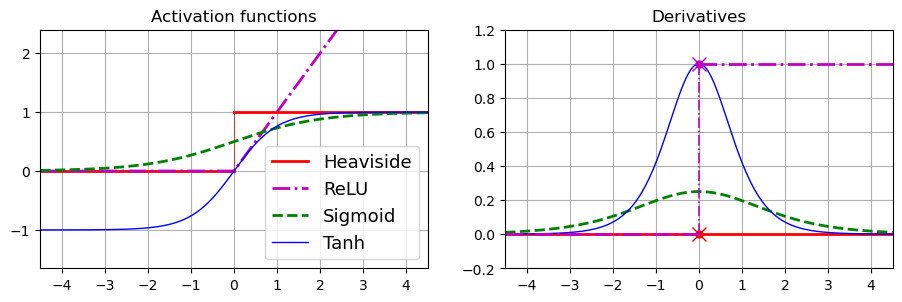

In [6]:
import matplotlib.pyplot as plt

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))

plt.subplot(121)
plt.plot([-max_z, 0], [0, 0], "r-", linewidth=2, label="Heaviside")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
plt.plot([0, max_z], [1, 1], "r-", linewidth=2)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("Activation functions")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Heaviside")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=1, label="Tanh")
plt.plot([-max_z, 0], [0, 0], "m-.", linewidth=2)
plt.plot([0, max_z], [1, 1], "m-.", linewidth=2)
plt.plot([0, 0], [0, 1], "m-.", linewidth=1.2)
plt.plot(0, 1, "mo", markersize=5)
plt.plot(0, 1, "mx", markersize=10)
plt.grid(True)
plt.title("Derivatives")
plt.axis([-max_z, max_z, -0.2, 1.2])

plt.show()

为什么需要激活函数？

如果连接多个线性变换，那么得到的只是一个线性变换。例如，如果 $f(x)=2x+3$ 且 $g(x)=5x-1$，则连接这两个线性函数可以得到另一个线性函数：
$$
f(g(x)) = 2(5x-1)+3 = 10x+1
$$

因此，如果层之间没有非线性，那么即使是很深的层堆叠也等同于单个层，因此你无法解决非常复杂的问题。

相反，具有非线性激活的足够大的 DNN 理论上可以近似任何连续函数。

In [7]:
def sigmoid(zi_bian_liang):
    return 1 / (1+np.exp(-zi_bian_liang))

x = 0.5
y = sigmoid(0.5)

dy_dx = (sigmoid(0.5 + 1e-7) - sigmoid(0.5)) / (1e-7)
print(dy_dx)

print(y * (1-y))

0.23500370871509801
0.2350037122015945


## MLP回归

MLP可用于回归任务。如果要预测单个值（例如，房屋的价格，给定其许多特征），则只需要单个输出神经元：其输出就是预测值。

对于多元回归（即一次预测多个值），每个输出维度需要一个输出神经元。例如，要在图像中定位物体的中心，你需要预测2D坐标，因此需要两个输出神经元。

如果还想在物体周围放置边框，则还需要两个数值：物体的宽度和高度。因此，得到了四个输出神经元。

Scikit-Learn包含一个MLPRegressor类，用它来构建一个具有三个隐藏层的MLP，每个隐藏层由50个神经元组成，并在房屋数据集上对其进行训练。

为简单起见，我们将使用Scikit-Learn的fetch_california_housing()函数来加载数据。这个数据集只包含数值特征（没有ocean_proximity特征），并且没有缺失值。

下面的代码首先获取和拆分数据集，然后创建一个流水线来标准化输入特征，之后再将它们送到MLPRegressor。

标准化神经网络非常重要，因为它们是使用梯度下降训练的，当特征具有非常不同的尺度时，梯度下降不会很好地收敛。

最后，代码训练模型并评估其验证误差。该模型在隐藏层中使用ReLU激活函数，并使用称为Adam的梯度下降变体（后面会讨论）来最小化均方误差，并使用一点点l2正则化（你可以通过超参数alpha进行控制）：

In [60]:
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()  # 可能要换成作业5的数据集
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50,50,50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

rmse

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.505332665796861

注意，此 MLP 不对输出层使用任何激活函数，因此它可以自由输出它想要的任何值。这通常没问题，但是如果你想保证输出永远是正数，那么你应该在输出层使用 ReLU 激活函数，或者 softplus 激活函数，它是 ReLU 的平滑变体：

$$
\text{softplus}(z) = \log(1 + \exp(z))
$$

当 $z$ 为负时，softplus 接近 0；当 $z$ 为正时，softplus 接近 $z$。

最后，如果你想保证预测总是落在给定的值范围内，那么你应该使用 sigmoid 函数或双曲正切函数，并将目标缩放到适当的范围：

- sigmoid 为 $0 \sim 1$
- tanh 为 $-1 \sim 1$

遗憾的是，`MLPRegressor` 类不支持输出层中的激活函数。

只需几行代码即可使用Scikit-Learn构建和训练标准MLP，但构建出的神经网络功能有限。这就是马上使用Keras实现MLP的原因。

`MLPRegressor` 类使用均方误差，这通常是回归所需的，但如果训练集中有很多异常值，可能更愿意改用平均绝对误差。

或者，可能想要使用 Huber 损失，它是两者的组合。当误差小于阈值 $\delta$（通常为 1）时，它是二次的，但当误差大于 $\delta$ 时，它是线性的。线性部分使其对异常值的敏感度低于均方误差，而二次部分使其收敛速度更快，比平均绝对误差更精确。但是，`MLPRegressor` 只支持 MSE。

下表总结了回归 MLP 的典型架构。

**典型的回归 MLP 架构**

| 超参数                     | 典型值                                                                 |
|----------------------------|------------------------------------------------------------------------|
| 隐藏层数量                 | 取决于问题，但通常为 1～5                                               |
| 每个隐藏层的神经元数量     | 取决于问题，但通常为 10～100                                            |
| 输出神经元数量             | 每个预测维度输出 1 个神经元                                             |
| 隐藏层激活                 | ReLU                                                                   |
| 输出激活                   | 无，或 ReLU/softplus（如果输出为正）或 sigmoid/tanh（如果输出有界）       |
| 损失函数                   | MSE，或 Huber（如果存在异常值）                                         |


## MLP分类

 MLP也可以用于分类任务。对于二进制分类问题，只需要使用sigmoid激活函数的单个输出神经元：输出将是0和1之间的数字，可以将其解释为正类的估计概率。负类的估计概率等于1减去该数字。

MLP还可以轻松处理多标签二元分类任务。例如，你可能有一个电子邮件分类系统，该系统可以预测每个收到的电子邮件是正常邮件还是垃圾邮件，并同时预测它是否是紧急电子邮件。

在这种情况下，需要两个输出神经元，两个都使用sigmoid激活函数：第一个输出电子邮件件为垃圾邮件的可能性，第二个输出电子邮件为紧急邮件的可能性。更一般地，为每个正类用一个输出神经元。请注意，每个输出概率不一定要加起来等于1。这使得模型可以输出标签的任意组合：可以包含非紧急正常邮件、紧急正常邮件、非紧急垃圾邮件，甚至可能是紧急垃圾邮件（尽管这可能是一个错误）。

如果每个实例只属于三个或更多分类中的一个类（例如，用于数字图像分类的类0~9），则每个类需要一个输出神经元，并且应该将输出层使用softmax激活函数（见下图）。softmax函数将确保所有估计的概率都在0和1之间，并且它们加起来等于1，因为分类是互斥的。这称为多类分类。

![softmax输出的神经网络](./images/neural_network/p6.png)


关于损失函数，由于正在预测概率分布，因此交叉熵损失（或对数损失）通常是一个不错的选择。

Scikit-Learn在`sklearn.neural_network`包中有一个`MLPClassifier`类。它几乎与`MLPRegressor`类相同，只是它最小化交叉熵而不是MSE。

**典型的分类MLP架构**

| 超参数     | 二元分类              | 多标签二元分类       | 多类分类    |
|------------|-------------------|------------------|-------------|
| 隐藏层     | 通常为 1~5 层，具体取决于任务                   |             |
| 输出神经元数量 | 1                 | 每个二元标签 1        | 每个类 1     |
| 输出层激活 | sigmoid           | sigmoid          | softmax     |
| 损失函数   | 交叉熵               | 交叉熵              | 交叉熵      |


随堂练习：使用Tensorflow playground（神经网络模拟器）：https://playground.tensorflow.org/， 感受神经网络的相关超参数

a.神经网络学习到的模式。单击“Run”按钮（左上方），尝试训练默认的神经网络。请注意，它如何快速找到一个适合分类任务的最优解。第一隐藏层中的神经元已经学会了简单模式，而第二隐藏层中的神经元已经学会了将第一隐藏层的简单模式组合为更复杂的模式。通常，层数越多，模式越复杂。

b.激活函数。尝试用ReLU激活函数替换tanh激活函数，然后再次训练网络。注意，它很快找到了最优解，但这次边界是线性的。这是由于ReLU函数的形状引起的。

c.局部极小值的风险。修改网络架构，使其只有一个具有3个神经元的隐藏层。对其进行多次训练（要重置网络权重，请单击“Play”按钮旁边的“Reset”按钮）。请注意，训练时间变化很大，有时甚至会停留在局部最小值中。

d.当神经网络太小时会发生的情况。删除一个神经元，只保留两个。请注意，即使你尝试多次，神经网络现在也无法找到一个好的解。该模型的参数太少，系统欠拟合训练集。

e.当神经网络足够大时会发生的情况。将神经元的数量设置为8个，然后对网络进行几次训练。请注意，它现在始终能快速运行，并且不会卡在某一点。这显示了神经网络理论中的一个重要发现：大型神经网络很少会陷入局部极小值，即使陷入了，这些局部最优也几乎与全局最优一样好。但是，它们仍然可能在很长一段时间内停滞不前。

f. 深层网络中梯度消失的风险。选择spiral数据集（“DATA”下的右下数据集），并将网络架构更改为4个隐藏层，每个隐藏层具有8个神经元。请注意，训练花费的时间更长，并且经常长时间停滞不前。还要注意，（右侧）最高层的神经元倾向于比（左侧）最低层的神经元更快地进化。这个问题称为“梯度消失”，可以通过后面要讨论的其他技术来缓解。

g. 尝试其他参数，建立对神经网络的直观了解。

## 使用Keras实现MLP


Keras是TensorFlow的高级深度学习API，可以构建、训练、评估和执行各种神经网络

Keras仅支持TensorFlow。同样，TensorFlow曾经包含多个高级API，但在TensorFlow 2问世时，Keras被正式选为其首选的高级API。安装TensorFlow也会自动安装Keras，如果没有安装TensorFlow，则Keras将无法运行。简而言之，Keras和TensorFlow绑定在一起

其他流行的深度学习库有Facebook的PyTorch (https://pytorch.org) 和谷歌的JAX (https://github.com/google/jax)

归功于它的简单性和出色的文档，Pytorch的受欢迎程度在2018年后呈指数级增长，它的API和Keras非常相似，了解Keras后容易迁移到Pytorch

接下来将通过Keras构建用于图像分类的MLP

### 使用顺序API构建图像分类器

加载数据集。将使用Fashion MNIST，它是MNIST的直接替代品。

它具有与MNIST完全相同的格式（70000个灰度图像，每幅28×28像素，有10个类），但是这些图像代表的是时尚物品，而不是手写数字，

因此每个类都更加多样，问题比MNIST更具挑战性。例如，简单的线性模型在MNIST上可以达到约92%的精度，但在Fashion MNIST上仅能达到约83%的精度。

In [61]:
# Keras提供了一些实用函数来获取和加载常见数据集，包括MNIST、Fashion MNIST等。
import tensorflow as tf

# 加载Fashion MNIST。它已经被打乱并分成了训练集（60000个图像）和测试集（10000个图像）
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test , y_test) = fashion_mnist

# 保留训练集中的最后5000个图像进行验证
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

# Tensorflow通常导入为tf，Keras API可通过tf.keras使用

In [62]:
X_train.shape
X_train.dtype

X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255. # 将像素强度降低到0-1的范围，255.是为了转成浮点数
#
# 之前的mnist，标签等于5时，说明图像代表手写数字5；但是对于Fashion MNIST,需要一个类名列表来了解需要处理的内容
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
y_train[0]
class_names[y_train[0]]

'Ankle boot'

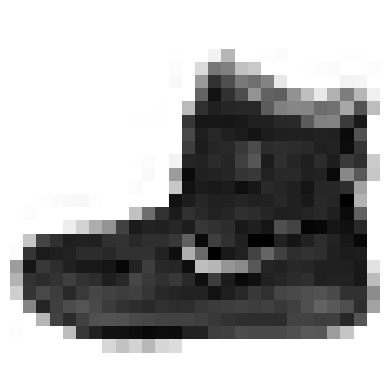

In [63]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

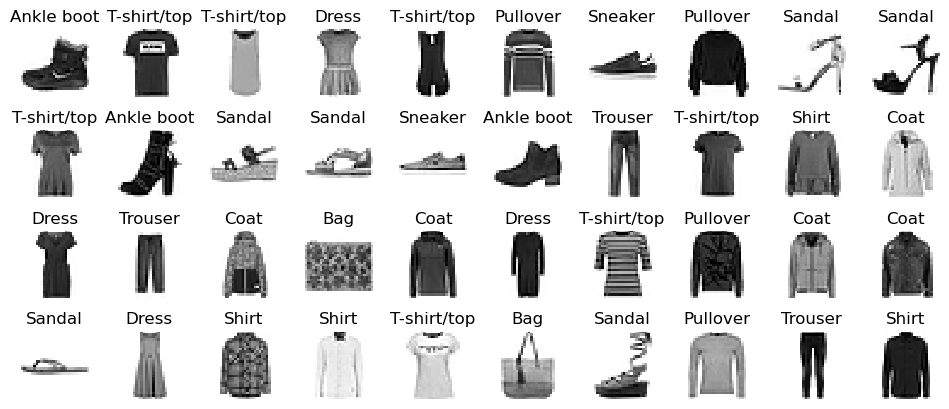

In [64]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [65]:
# 使用顺序（Squential API创建模型），创建具有两个隐藏层的分类MLP
tf.random.set_seed(42)
model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))  # tf.keras.activations.relu
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [66]:
tf.keras.backend.clear_session()

- 首先，设置TensorFlow的随机种子以使结果可重现：每次运行notebook时，隐藏层和输出层的随机权重都是相同的。
- 还可以选择使用tf.keras.utils.set_random_seed()函数，它可以方便地为TensorFlow、Python (random.seed())和NumPy(np.random.seed())设置随机种子
- 下一行创建一个Sequential模型。这是用于神经网络的最简单的Keras模型，仅由顺序连接的单层堆栈组成。这称为顺序API。
- 然后，构建第一层（Input层）并将其添加到模型中。我们指定输入shape，其中不包括批量大小，仅包括实例的形状。Keras需要知道输入的形状，以便确定第一个隐藏层连接权重矩阵的形状。
- 接下来添加一个Flatten层。它的作用是将每个输入图像转换为一维数组：例如，如果它接收到形状为[32，28，28]的批次，就把它重塑为[32，784]。
- 换句话说，如果它接收到输入数据X，它会计算X.reshape(-1，784)。该层没有任何参数，只是用来做一些简单的预处理。
- 接下来添加具有300个神经元的Dense隐藏层。它使用ReLU激活函数。每个Dense层管理自己的权重矩阵，其中包含神经元及其输入之间的所有连接权重。它还管理偏置项的一个向量（每个神经元一个）。
- 之后，添加第二个有100个神经元的Dense隐藏层，还是使用ReLU激活函数。
- 最后，添加一个包含10个神经元的Dense输出层（每个类一个），使用softmax激活函数，因为这些类是互斥的

激活函数的完整列表：https://keras.io/api/layers/activations

In [67]:
# 与其逐层添加，不如传递一个层列表
# 还可以不用Input层，直接用Flatten，并指定input_shape

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

C:\Users\31752\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [68]:
# 模型的summary()方法显示模型的所有层，
# 包括每个层的名称（除非在创建层时进行设置，否则会自动生成）、其输出形状（None表示批大小任意），以及它的参数数量。摘要(summary)以参数总数结尾，包括可训练和不可训练的参数。在这里，只有可训练的参数
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
tf.keras.utils.plot_model(model, "./images/neural_network/my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


请注意，Dense层通常有很多参数。例如，第一个隐藏层的连接权重为784×300，外加300个偏置项，总共有235500个参数！这为模型提供了足够的灵活性来拟合训练数据，但这也意味着模型存在过拟合的风险，尤其是在你没有大量训练数据的情况下；

模型中的每一层都必须有一个唯一的名称（例如，"dense_2"）。可以使用构造函数的name参数显式设置图层名称，但通常让Keras自动命名图层更简单

Keras还通过在需要时附加索引来确保名称全局唯一，即使跨模型也是如此，如"dense_2"。 命名唯一保证合并模型时不会出现名称冲突

Keras管理的所有全局状态都存储在Keras会话中，可以使用tf.keras.backend.clear_session()清除该会话，可以重置名称计数器

In [70]:
# tf.keras.backend.clear_session()

In [71]:
# 使用layers属性轻松获取模型的层列表，或使用get_layers()方法按名称访问层
model.layers
hidden1 = model.layers[1]
hidden1.name
model.get_layer("dense") is hidden1

True

In [72]:
# 使用get_weights()和 set_weights()方法访问层的所有参数。对于Dense层，包括连接权重和偏置项
weights, biases = hidden1.get_weights()
weights
weights.shape
biases
biases.shape

(300,)

注意，Dense层随机初始化了连接权重（这是打破对称性所必需的，正如前面所讨论的）

并且偏置被初始化为零，这是可以的。如果要使用其他初始化方法，则可以在创建层时设置kernel_initializer（核是连接权重矩阵的另一个名称）或bias_initializer，完整初始化器列表：https://keras.io/api/layers/initializers

权重矩阵的形状取决于输入的数量，这就是在创建模型时指定input_shape的原因。

如果不指定输入形状，也没关系：Keras会简单地等待，直到它知道输入形状，然后才会实际构建模型参数。

当向它提供一些数据（例如，在训练期间）或调用它的build()方法时，就会发生这种情况。

在构建模型参数之前，将无法执行某些操作，例如显示模型摘要或保存模型。因此，如果在创建模型时知道输入形状，最好指定它。

In [73]:
# 创建模型后，必须调用compile()方法来指定损失函数 和 要使用的优化器。
# 也可以选择指定在训练和评估期间要计算的其他指标


# model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
# model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(), metrics=["accuracy"])

model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

使用loss="sparse_categorical_crossentropy"等同于使用loss=tf.keras.losses.sparse_categorical_crossentropy。

同样，使用optimizer="sgd"等同于使用optimizer=tf.keras.optimizers.SGD()

使用metrics=["accuracy"]等同于使用metrics=[tf.keras.metrics.sparse_categorical_accuracy]（使用此损失时）。

将使用许多其他损失、优化器和指标，有关完整列表，请参阅 https://keras.io/api/losses https://keras.io/api/optimizers 和 https://keras.io/api/metrics。

使用"sparse_categorical_crossentropy"损失，因为有稀疏标签（即对于每个实例，只有一个目标类索引，在这种情况下为0～9），并且这些类是互斥的。

相反，如果每个实例的每个类都有一个目标概率（例如独热向量，[0.，0.，0.，1.，0.，0.，0.，0.，0.，0]代表类3），则需要使用"categorical_crossentropy"损失。

如果进行二元分类或多标签二元分类，则在输出层中使用"sigmoid"激活函数，而不是"softmax"激活函数，并且使用"binary_crossentropy"损失。

In [74]:
# 如果要将稀疏标签（即类索引）转换为独热向量标签，则使用tf.keras.utils.to_categorical()函数。反之，请使用np.argmax()函数和axis=1。
import numpy as np
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)

np.argmax(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
    axis=1
)

array([0, 5, 1, 0], dtype=int64)

关于优化器，"sgd" 表示我们使用随机梯度下降来训练模型。换句话说，Keras 将执行先前所述的反向传播算法（即反向模式自动微分加梯度下降）。之后讨论更有效的优化器，它们改进了梯度下降，而不是自动微分。

使用 SGD 优化器时，调整学习率很重要。因此，通常会希望使用

optimizer = tf.keras.optimizers.SGD(learning_rate=?)


In [75]:
# 训练和评估模型
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.7063 - sparse_categorical_accuracy: 0.7663 - val_loss: 0.5010 - val_sparse_categorical_accuracy: 0.8294
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4847 - sparse_categorical_accuracy: 0.8318 - val_loss: 0.4512 - val_sparse_categorical_accuracy: 0.8408
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4399 - sparse_categorical_accuracy: 0.8456 - val_loss: 0.4297 - val_sparse_categorical_accuracy: 0.8464
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4126 - sparse_categorical_accuracy: 0.8552 - val_loss: 0.4153 - val_sparse_categorical_accuracy: 0.8498
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3927 - sparse_categorical_accuracy: 0.8621 - val_loss: 0.4050 - val_sparse_categorical_accuracy: 0.8522
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3769 - sparse_categorical_accuracy: 0.8668 - val_loss: 0.3968 - val_sparse_categorical_accuracy:

将输入特征(X_train)和目标类(y_train)以及要训练的轮次数传递给它（否则它将默认为1，这绝对不足以收敛为一个好的模型）。

还传递了一个验证集（这是可选的）。Keras将在每个轮次结束时测量此集合上的损失和其他指标，这对于查看模型的实际效果非常有用。

如果训练集的性能好于验证集，则模型可能过拟合训练集，或者存在错误，例如训练集和验证集之间的数据不匹配。

随堂练习：形状错误很常见，尤其是在刚开始时，因此应该熟悉错误消息：尝试使用错误形状的输入或标签拟合模型，然后查看你得到的错误。

同样，尝试使用loss="categorical_crossentropy"而不是loss="sparse_categorical_crossentropy"编译模型。

或者可以删除Flatten层

或者使用metrics=[tf.keras.metrics.categorical_crossentroy]  看看运行出来会出什么报错 / 有什么不对的地方

In [76]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
# model.summary()
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])
model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


C:\Users\31752\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.7023 - sparse_categorical_accuracy: 0.7715 - val_loss: 0.5011 - val_sparse_categorical_accuracy: 0.8304
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4836 - sparse_categorical_accuracy: 0.8324 - val_loss: 0.4520 - val_sparse_categorical_accuracy: 0.8406
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4398 - sparse_categorical_accuracy: 0.8469 - val_loss: 0.4271 - val_sparse_categorical_accuracy: 0.8482
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4133 - sparse_categorical_accuracy: 0.8555 - val_loss: 0.4114 - val_sparse_categorical_accuracy: 0.8544
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3938 - sparse_categorical_accuracy: 0.8617 - val_loss: 0.3997 - val_sparse_categorical_accuracy: 0.8580
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3785 - sparse_categorical_accuracy: 0.8670 - val_loss: 0.3907 - val_sparse_categorical_accuracy: 0.8598
Epo

已经训练了神经网络！

在训练期间的每个轮次，Keras在进度条的左侧显示到目前为止已处理的批次数。批量大小默认为32，由于训练集有55000个图像，因此模型每轮经过1719个批次：1718个批次大小为32，1个批次大小为24。

在进度条之后，可以看到每个样本的平均训练时间，以及训练集和验证集的损失和精度（或你要求的任何其他额外指标）。请注意，训练损失下降了，这是一个好兆头，30轮后验证精度达到88.54%。这略低于训练精度，因此会出现一点点过拟合，但不会很大。

可以将validation_split设置为希望Keras用于验证的训练集的比率，而不是使用validation_data参数传递验证集。例如，validation_split=0.1告诉Keras使用数据的最后10%（在打乱之前）进行验证。

如果训练集非常不平衡，其中某些类的样本过多，而其他类的样本不足，那么在调用fit()方法时设置class_weight参数会很有用，给样本不足的类更大的权重，给样本过多的类更小的权重。

Keras在计算损失时将使用这些权重。如果需要每个实例的权重，请设置sample_weight参数。如果同时提供了class_weight和sample_weight，则Keras会将它们相乘。

例如，如果某些实例由专家标记，而另一些实例使用众包平台标记，则每个实例的权重可能很有用：可能希望为前者赋予更大权重。

还可以通过将其作为validation_data元组的第三项添加到验证集中来提供样本权重（但不提供类权重）

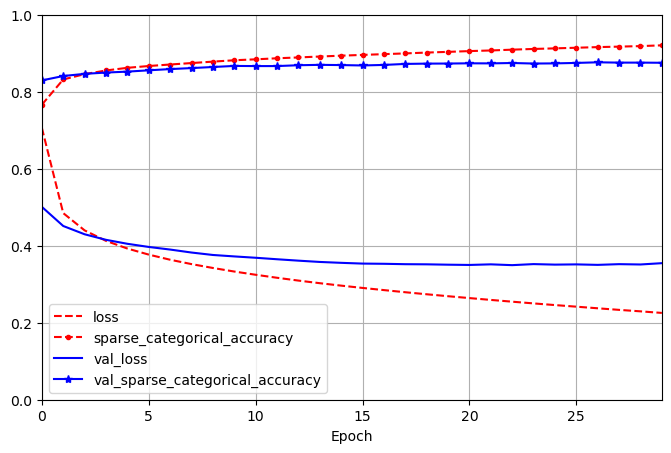

In [77]:
# fit()方法返回一个History对象，其中包含训练参数(history.params)、经历的轮次列表(history.epoch)，
# 最重要的是包含在训练集和验证集（如果有）上每轮结束时测得的损失和额外指标的字典(history.history)。
history.params
history.epoch
history.history

# 使用此字典创建pandas DataFrame并调用其plot()方法
import pandas as pd
pd.DataFrame(history.history)

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")

plt.show()

可以看到训练期间训练精度和验证精度都在稳步提高，而训练损失和验证损失则在下降。这很好。

验证曲线起初彼此比较接近，但随着时间的推移它们变得越来越远，这表明存在一点点过拟合。

在这种情况下，刚开始训练时，该模型看起来在验证集上的表现要好于在训练集上的表现。

但是事实并非如此：验证误差是在每个轮次结束时计算的，而训练误差是使用每个轮次运行平均值计算的。

因此，训练曲线应向左移动半个轮次。

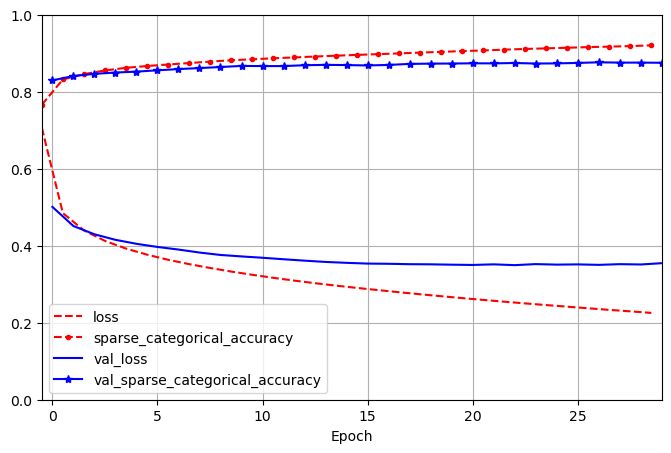

In [78]:
# 训练曲线向左移动0.5个轮次
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 29, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()

训练集的性能最终会超过验证性能，就像通常情况下训练足够长的时间一样。可以说模型尚未完全收敛，

因为验证损失仍在下降，因此可能应该继续训练。可以直接再次调用fit()方法，因为Keras只是从它停止的地方继续训练，应该能够达到大约89.8%的验证精度，

而训练精度将继续上升到100%（这并非总是如此）。

如果对模型的性能不满意，则应回头调整超参数。首先要检查的是学习率。

如果这样做没有帮助，请尝试使用另一个优化器（并在更改任何超参数后始终重新调整学习率）。

如果性能仍然不佳，则尝试调整模型超参数（例如层数）、每层神经元数，以及用于每个隐藏层的激活函数的类型。

还可以尝试调整其他超参数，例如批量大小（可以在fit()方法中使用batch_size参数进行设置，默认为32）。

我们将学习神经网络的超参数调整。对模型的验证精度感到满意后，应在测试集上评估其泛化误差，然后再将模型部署到生产环境中。可以使用evaluate()方法轻松完成此操作（它还支持其他几个参数，例如batch_size和sample_weight）

在测试集上获得比在验证集上略低的性能是很常见的，因为超参数是在验证集而不是测试集上进行调优的

In [27]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3550 - sparse_categorical_accuracy: 0.8794


[0.35496750473976135, 0.8794000148773193]

接下来，我们可以使用模型的predict()方法对新实例进行预测。由于没有实际的新实例，因此将仅使用测试集的前三个实例：

In [28]:
# 使用模型进行预测
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.23, 0.  , 0.02, 0.  , 0.76],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [29]:
import numpy as np
y_pred = np.argmax(y_proba, axis=-1)
y_pred
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[4 5 5 3 4 1 2 2 8 0]


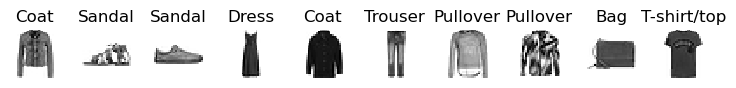

In [30]:
# 对3个图像都进行了正确分类
plt.figure(figsize=(9, 2.4))

X_new = X_test[10:20]
y_proba = model.predict(X_new)
y_pred = np.argmax(y_proba, axis=-1)
print(y_pred)

for index, image in enumerate(X_new):
    plt.subplot(1, 10, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_pred[index]])
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

### 使用顺序API构建回归MLP

使用顺序API来构建、训练、评估和使用回归MLP与分类所做的非常相似。

以下代码示例的主要区别在于输出层只有一个神经元（因为只预测一个值），并且它不使用激活函数，损失函数是均方误差，度量是RMSE，

使用像Scikit-Learn的MLPRegressor那样的Adam优化器。

此外，在这个示例中，不需要Flatten层，而是使用Normalization层作为第一层：它与Scikit-Learn的StandardScaler做同样的事情，但它必须在调用模型的fit()方法之前调用adapt()方法来拟合训练数据。（Keras还有其他预处理层）。

In [31]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [32]:
from sklearn.datasets import get_data_home

get_data_home()  # 看sklearn数据存在本地的位置

'C:\\Users\\31752\\scikit_learn_data'

In [33]:
tf.random.set_seed(42)

# (m,n) -> 单个样数据的形状： (n,)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])  # keras的input_shape要的是单个样本的形状， 把第一个维度去掉就是标准化需要的样本形状
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.summary()

C:\Users\31752\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,618 (21.95 KB)

 Trainable params: 5,601 (21.88 KB)

 Non-trainable params: 17 (72.00 B)

In [34]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.9229 - loss: 0.8517 - val_RootMeanSquaredError: 0.6735 - val_loss: 0.4536
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6171 - loss: 0.3809 - val_RootMeanSquaredError: 0.5911 - val_loss: 0.3495
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.5930 - loss: 0.3517 - val_RootMeanSquaredError: 0.5986 - val_loss: 0.3584
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5806 - loss: 0.3371 - val_RootMeanSquaredError: 0.5766 - val_loss: 0.3325
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5740 - loss: 0.3294 - val_RootMeanSquaredError: 0.6567 - val_loss: 0.4313
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5643 - loss: 0.3184 - val_RootMeanSquaredError: 0.6723 - val_loss: 0.4519
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5577 - los

In [35]:
print(mse_test)
rmse_test
y_pred

0.2849547564983368


array([[0.51582927],
       [0.97503245],
       [5.0478854 ]], dtype=float32)

当调用adapt()方法时，Normalization层会学习训练数据中的特征均值和标准差。然而，当显示模型的摘要时，这些统计数据被列为不可训练的。这是因为这些参数不受梯度下降的影响。

### 使用函数式API构建复杂模型


顺序API非常简洁明了。然而，虽然Sequential模型非常常见，但有时构建具有更复杂拓扑结构或具有多个输入或输出的神经网络很有用。为此，Keras提供了函数式API。

非顺序神经网络的一个示例是“宽深”神经网络。这种神经网络架构是在2016年发表的论文引入的。它将所有或部分输入直接连接到输出层，如图1所示。这种架构使神经网络能够学习深度模式（使用深度路径）和简单规则（通过短路径)。

相比之下，常规的MLP迫使所有数据流经整个层的堆栈。因此，数据的简单模式最终可能会因为顺序被转换而失真。

![宽深神经网络](./images/neural_network/p7.png)

In [36]:
class MyClass:
    def __init__(self):
        self.x = 10

    def __call__(self, a):
        print(f"这个__call__正在被调用 {a}")

mc = MyClass()
mc("abc")  # MyClass.__call__(mc)   # 展示自定义类的实例 为什么可以被当成函数一样 调用
callable(mc)  # True, mc可以被调用
callable(MyClass)  # True, 类本身可以被调用

a = 1
callable(a)  # False，整数不能被调用

这个__call__正在被调用 abc


False

In [37]:
tf.keras.backend.clear_session()

normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()   # 创建合并层
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)

concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [38]:
# input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
# normalized_layer = tf.keras.layers.Normalization()
# normalized  =   normalized_layer(input_)
# hidden1 = tf.keras.layers.Dense(30, activation="relu")(normalized)
# hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
# concat =  tf.keras.layers.Concatenate()([hidden1, hidden2])
# output = tf.keras.layers.Dense(1)(concat)
#
# model = tf.keras.Model(inputs=[input_], outputs=[output])

In [39]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 8)         │         17 │ input_layer[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 30)        │        270 │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 30)        │        930 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ normalization[0]… │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

In [40]:
tf.keras.utils.plot_model(model, "./images/neural_network/wide_deep_nn.png", show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


在高层次上，前5行创建了我们构建模型所需的所有层，接下来的6行就像函数一样使用这些层，从输入到输出，最后一行通过指向输入和输出创建一个Keras Model对象。

详细地看一下这段代码：
- 首先，创建5层：一个用于标准化输入的Normalization层，两个Dense层（每层有30个神经元，使用ReLU激活函数），一个Concatenate层，以及一个Dense层（输出层只有一个单神经元，没有任何激活函数）。
- 接下来，创建一个Input对象（变量名称input_用于避免掩盖Python的内置input()函数)。这是模型将要获得的输入类型的一个规范，包括其shape和可选的dtype，默认为32位浮点数。一个模型实际上可能有多个输入
- 然后，像函数一样使用Normalization层，将Input对象传递给它。这就是将其称为函数式API的原因。请注意，只是告诉Keras应该如何将各层连接在一起，尚未处理任何实际数据，因为Input对象只是一个数据规范。换句话说，它是一个符号输入。此调用的输出也是符号化的：normalized不存储任何实际数据，仅用于构建模型。· 之后以同样的方式，我们将normalized传递给hidden_layer1，它输出hidden1，再将hidden1传递给hidden_layer2，它输出hidden2。
- 到目前为止，虽然已经按顺序连接了层，但还要使用concat_layer连接输入和第二个隐藏层的输出。同样，还没有连接实际数据：都是象征性的，用于构建模型。
- 之后，我们将concat传递给output_layer，它给我们最终的output。
- 最后，我们创建一个Keras Model，指定要使用的输入和输出。一旦构建了Keras模型，一切就都与之前的一样，因此无须在此重复：编译模型，Normalization层拟合数据，拟合模型，评估模型并使用它进行预测。

In [41]:
# 用这个神经网络来解决房价预测问题
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 1.1307 - loss: 1.2784 - val_RootMeanSquaredError: 0.7561 - val_loss: 0.5717
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6632 - loss: 0.4398 - val_RootMeanSquaredError: 0.6249 - val_loss: 0.3905
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6153 - loss: 0.3786 - val_RootMeanSquaredError: 0.5955 - val_loss: 0.3547
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5978 - loss: 0.3574 - val_RootMeanSquaredError: 0.5925 - val_loss: 0.3511
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5881 - loss: 0.3459 - val_RootMeanSquaredError: 0.6080 - val_loss: 0.3697
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5821 - loss: 0.3389 - val_RootMeanSquaredError: 0.6268 - val_loss: 0.3928
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5771 - los

In [42]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [43]:
# 如果想通过宽路径送入特征的子集，而通过深路径送入特征的另一个子集 ： 一次使用多个输入
input_wide = tf.keras.layers.Input(shape=[5], name="NoHidden")  # 5个特征
input_deep = tf.keras.layers.Input(shape=[6], name="YesHidden")  # 6个特征

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [44]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ YesHidden           │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 6)         │         13 │ YesHidden[0][0]   │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ NoHidden            │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 30)        │        210 │ normalization_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 5)         │         11 │ NoHidden[0][0]    │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 30)        │        930 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 35)        │          0 │ normalization_1[… │
│ (Concatenate)       │                   │            │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │         36 │ concatenate_1[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,200 (4.70 KB)

 Trainable params: 1,176 (4.59 KB)

 Non-trainable params: 24 (104.00 B)

In [45]:
tf.keras.utils.plot_model(model, "./images/neural_network/wide_deep_inputs_nn.png", show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


![多输入宽深神经网络](./images/neural_network/p8.png)

- 每个Dense层都在同一行上创建和调用。这是一种常见的做法，因为它使代码更简洁而不失清晰。
- 但是，我们不能对Normalization层执行此操作，因为我们需要一个对该层的引用才能在拟合模型之前调用其adapt()方法。
- 使用了tf.keras.layers.concatenate()，创建一个Concatenate层并使用给定的输入调用它。·
- 在创建模型时指定了inputs=[input_wide，input_deep]，因为有两个输入。

In [46]:
# 可以像往常一样编译模型，但当调用fit()方法时，必须传递一对矩阵（X_train_wide, X_train_deep), 代表两个输入，而不是传递单个输入矩阵X_train
# 当调用evaluate() 或 predict()时，对于X_valid以及X_test和X_new也是如此

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]   # 宽的5个特征（0-4）， 深的6个特征（2-7）
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]

X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

X_train_dict = {"YesHidden": X_train_deep, "NoHidden": X_train_wide}
history = model.fit(X_train_dict, y_train, epochs=20, validation_data=((X_valid_wide, X_valid_deep), y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 1.2333 - loss: 1.5209 - val_RootMeanSquaredError: 1.1808 - val_loss: 1.3943
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.7473 - loss: 0.5584 - val_RootMeanSquaredError: 1.0436 - val_loss: 1.0890
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6908 - loss: 0.4773 - val_RootMeanSquaredError: 1.3983 - val_loss: 1.9553
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6535 - loss: 0.4271 - val_RootMeanSquaredError: 1.8242 - val_loss: 3.3276
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6426 - loss: 0.4129 - val_RootMeanSquaredError: 1.6817 - val_loss: 2.8281
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6258 - loss: 0.3916 - val_RootMeanSquaredError: 2.0148 - val_loss: 4.0593
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6261 - los

In [47]:
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - RootMeanSquaredError: 0.5905 - loss: 0.3487
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


创建输入时设置name="input_wide"和name="input_deep"，则可以传递字典{"input_wide"：X_train_wide，"input_deep"：X_train_deep，而不是传递元组(X_train_wide，X_train_deep)。当有很多输入时，强烈建议这样做，以澄清代码和避免弄错顺序。

 在许多用例中，可能需要多个输出：
- 例如，可能想在图片中定位和分类主要对象。这既是回归任务又是分类任务。

同样，可能有基于同一数据的多个独立任务。当然，可以为每个任务训练一个神经网络，但是在许多情况下，通过训练每个任务一个输出的单个神经网络，会在所有任务上获得更好的结果。这是因为神经网络可以学习数据中对任务有用的特征。

例如，可以对面部图片执行多任务分类，使用一个输出对人的面部表情进行分类（微笑、惊讶等），并使用另一个输出来识别他们是否戴着眼镜。

另一个示例是作为正则化技术（即训练约束，其目的是减少过拟合，从而提高模型的泛化能力）。
- 例如，可能希望在神经网络架构中添加一个辅助输出， 避免网络层的参数拟合数据的噪声

辅助输出给了前半段层一个独立的优化目标：前半段参数不仅要服务于主输出，还要让辅助输出的预测达标。这就分散了 “过拟合风险”—— 后半段层不用再承担 “修正所有问题” 的压力，前半段层也被迫学更通用的特征，整个网络的参数不会过度偏向拟合训练数据的局部特性。

![处理多输出，添加辅助输出以正则化](./images/neural_network/p9.png)

In [48]:
# 添加额外的输出非常容易，只需将它们连接到适当的层，然后将它们添加到模型的输出列表中

tf.keras.backend.clear_session()
tf.random.set_seed(42)

input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, aux_output])

In [49]:
tf.keras.utils.plot_model(model, "./images/neural_network/wide_deep_inputs_outputs_nn.png", show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [50]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 6)         │         13 │ input_layer_1[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer         │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 30)        │        210 │ normalization_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 5)         │         11 │ input_layer[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 30)        │        930 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 35)        │          0 │ normalization[0]… │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         36 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │         31 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,231 (4.82 KB)

 Trainable params: 1,207 (4.71 KB)

 Non-trainable params: 24 (104.00 B)

每个输出都需要自己的损失函数。因此当编译模型时，应该传递一系列损失。

如果传递单个损失，Keras将假定所有输出必须使用相同的损失。默认情况下，Keras将计算所有这些损失，并将它们简单累加即可得到用于训练的最终损失。

我们更关心主要输出而不是辅助输出（因为它仅用于正则化），因此要给主要输出的损失更大的权重。可以在编译模型时设置所有的损失权重：

In [51]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer, metrics=["RootMeanSquaredError"])

可以传递字典loss={"output"："mse"，"aux_output"："mse"，而不是传递元组loss=("mse"，"mse")

假设用name="output"和name="aux_output"创建了输出层。就像输入一样，这可以澄清代码并避免在有多个输出时出错。也可以为loss_weights传递一个字典。

现在当训练模型时，需要为每个输出提供标签。在此示例中，主输出和辅助输出应尝试预测同一事物，因此它们应使用相同的标签。

因此，如果输出名为"output"和"aux_output"，需要传递(y_train，y_train)或字典{"output"：y_train，"aux_output"：y_train，而不是传递y_train。y_valid和y_test也是如此：

In [52]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20, validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20


ValueError: For a model with multiple outputs, when providing the `metrics` argument as a list, it should have as many entries as the model has outputs. Received:
metrics=['RootMeanSquaredError']
of length 1 whereas the model has 2 outputs.

In [ ]:
# 评估模型时，Keras返回损失的加权和，以及所有单独的损失和指标
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test), return_dict=False) # 设置return_dict=True，那么evaluate()将返回一个字典而不是一个列表
eval_results

In [ ]:
# predict()方法将为每个输出返回预测值
y_train_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

# predict()方法返回一个元组，它没有return_dict参数来获取字典，但可以利用model.output_names创建一个
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))
y_pred

In [ ]:
# 随堂练习：使用字典改写这个多输入 和 多输出的神经网络模型，并进行训练和评估
tf.keras.backend.clear_session()
tf.random.set_seed(42)

### 使用子类化API构建动态模型

顺序API和函数式API都是声明性的：首先声明要使用的层以及应该如何连接它们，然后才能开始向模型提供一些数据进行训练或推断。这有许多优点：可以轻松地保存、克隆和共享模型；可以显示和分析它的结构；该框架可以推断形状和检查类型，因此可以及早发现错误（即在任何数据通过模型之前）。由于整个模型是一个静态图，因此调试起来也相当容易。但另一方面是它是静态的

一些模型涉及循环、变化的形状、条件分支和其他动态行为。对于这种情况，或者只是你喜欢命令式的编程风格，则子类化API非常适合。

子类化Model类，在构造函数中创建所需的层，然后在call()方法中执行所需的计算。例如，创建以下WideAndDeepModel类的实例将给我们一个等效于刚刚使用函数式API构建的模型：

In [ ]:
# 构造函数中创建层与在call()方法中使用层分开。
# 不需要创建Input对象：可以使用call()方法的Input参数
import tensorflow as tf
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # 需要调用这句话，模型才有名字
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_wide, input_deep = inputs

        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

tf.random.set_seed(42)
model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

In [ ]:
# 现在有了一个模型实例，可以编译它，
# 调用它的归一化层（例如，使用model.norm_layer_wide.adapt(...)和model.norm_layer_deep.adapt(...)），拟合它，
# 评估它，并使用它进行预测，就像对函数式API所做的那样。
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=["RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)

history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

In [ ]:
class MyModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.norm_layer = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units=units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        print(f"My Model is called： {inputs}")
        norm = self.norm_layer(inputs)
        hidden1 = self.hidden1(norm)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm, hidden2])
        output = self.main_output(concat)
        return output

my_model = MyModel()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
my_model.compile(loss=["mse"], optimizer=optimizer,
              metrics=["RootMeanSquaredError"])
my_model.norm_layer.adapt(X_train)


In [54]:
my_model.fit(X_train, y_train, epochs=10)

NameError: name 'my_model' is not defined

这个API的最大区别在于，可以在call()方法中包含几乎任何想要的内容：for循环、if语句、低级TensorFlow操作

这使得它在尝试新想法时成为一个很好的API，尤其是对于研究人员而言。

然而，这种额外的灵活性确实是有代价的：模型的架构隐藏在call()方法中，因此Keras无法轻松检查它

无法使用tf.keras.models.clone_model()克隆模型，并且当调用summary()方法时，只会得到一个层列表，而没有任何关于它们是如何相互连接的信息。

而且Keras无法提前检查类型和形状，更容易出错

因此，除非真的需要额外的灵活性，否则你应该坚持使用顺序API或函数式API。

### 保存和还原模型

设置save_format="tf"时，Keras使用TensorFlow的保存模型格式保存模型：这是一个包含多个文件和子目录的目录（具有给定的名称）。特别地，saved_model.pb文件以序列化计算图的形式包含模型的架构和逻辑，因此无须部署模型的源代码即可在生产环境中使用它, SavedModel足够。

keras_metadata.pb文件包含Keras所需的额外信息。variables子目录包含所有参数值（包括连接权重、偏置、归一化统计信息和优化器参数），如果模型非常大，则可能会拆分为多个文件。最后，assets目录可能包含额外的文件，例如数据样本、特征名称、类名称等。默认情况下，assets目录是空的。因为优化器也已保存，包括它的超参数和它可能具有的任何状态，加载模型后可以根据需要继续训练。

In [ ]:
model.save("./models/my_keras_model", save_format="tf")

# todo: Warning: Keras's model.save() method no longer supports TensorFlow's SavedModel format. However, you can still export models to the SavedModel format using model.export() like this:
# model.export("./models/my_keras_model")

通常会有一个脚本来训练模型并保存它，以及一个或多个脚本（或Web服务）来加载模型并使用它来评估模型或进行预测。加载模型和保存模型一样简单：

还可以使用save_weights()和load_weights()来仅保存和加载参数值。这包括连接权重、偏置、预处理统计数据、优化器状态等。参数值保存在一个或多个文件，以及一个索引文件中

In [ ]:
# todo：Warning: Keras now requires the saved weights to have the .weights.h5 extension. There are no longer saved using the SavedModel format.
model.save_weights("./models/my_weights.weights.h5")
model.load_weights("./models/my_weights.weights.h5")

In [ ]:
# To load a .keras model, use the tf.keras.models.load_model() function. If the model uses any custom object, you must pass them to the function via the custom_objects argument:
model = tf.keras.models.load_model("./models/my_keras_model", custom_objects={"WideAndDeepModel": WideAndDeepModel})
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

# todo：Warning: In Keras 3, it is no longer possible to load a TensorFlow SavedModel as a Keras model. However, you can load a SavedModel as a tf.keras.layers.TFSMLayer layer, but be aware that this layer can only be used for inference: no training.
# tfsm_layer = tf.keras.layers.TFSMLayer("./models/my_keras_model")
# y_pred_main, y_pred_aux = tfsm_layer((X_new_wide, X_new_deep))

### 使用回调函数

与保存整个模型相比，仅保存权重速度更快且使用的磁盘空间更少，适用于训练期间保存快速检查点

如果你正在训练一个大模型，并且需要数小时或数天，那么必须定期保存检查点以防计算机崩溃。但是如何告诉fit()方法保存检查点呢？使用回调函数。

fit()方法接收一个callbacks参数，该参数允许你指定Keras将在训练前后、每个轮次前后，甚至处理每个批次前后调用的对象列表。例如，在训练期间ModelCheckpoint回调会定期保存模型的检查点，默认情况下，在每个轮次结束时：

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("./models/my_checkpoints.weights.h5",
                                                   save_weights_only=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb])

此外，如果在训练期间使用验证集，则可以在创建ModelCheckpoint时设置save_best_only=True。在这种情况下，只有当模型在验证集上的性能达到当前最佳时，它才会保存模型。这样，就不必担心训练时间太长而过拟合训练集：只需还原训练后保存的最后一个模型，这就是验证集中的最佳模型。这是实现早停的一种方法，但它不会真正停止训练。

另一种方法是使用EarlyStopping回调。当它在多个轮次（由patience参数定义）测量验证集没有进展时，它将中断训练，如果设置restore_best_weights=True，则它将在训练结束时回滚到最佳模型。可以结合这两个回调来保存模型的检查点，以防计算机崩溃，并在没有更多进展时提前中断训练，以避免浪费时间和资源并减少过拟合：

In [ ]:
# 轮次的数量可以设置为一个很大的值，因为当没有更多进展时训练会自动停止（只要确保学习率不要太小，否则它可能会一直进展缓慢，直到结束
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=100,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb])

# EarlyStopping回调会将最佳模型的权重存储在内存中，并在训练结束时为你恢复它们。

tf.keras.callbacks包 (https://keras.io/api/callbacks) 中提供了许多其他回调。

如果需要额外的控制，可以轻松编写自己的自定义回调。例如，以下自定义回调将显示训练期间验证损失与训练损失之间的比率（例如，检测过拟合）：

可以实现on_train_begin()、on_train_end()、on_epoch_begin()、on_epoch_end()、on_batch_begin()和on_batch_end()。

如果需要它们（例如，为了调试），也可以在评估和预测期间使用回调。对于评估，应该实现on_test_begin()、on_test_end、on_test_batch_begin()或on_test_batch_end()，它们由evaluate()调用。对于预测，你应该实现on_predict_begin()、on_predict_end()、on_predict_batch_begin()或on_predict_batch_end()，它们由predict()调用。

In [ ]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

In [ ]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[val_train_ratio_cb], verbose=0)

In [ ]:
import matplotlib.pyplot as plt
class MyDrawCallback(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.losses = []

    def on_epoch_end(self, epoch, logs):
        self.losses.append(logs["loss"])

    def on_train_end(self, logs):

        plt.plot(self.losses)

history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[MyDrawCallback()], verbose=0)

### 使用TensorBoard进行可视化

TensorBoard是一款出色的交互式可视化工具，可用于在训练期间查看学习曲线；

比较多次运行的学习曲线和指标；可视化计算图；

分析训练统计数据；查看由模型生成的图像；

把复杂的多维数据投影到3D，并自动进行聚类；分析你的网络（即测量其速度以识别瓶颈）等等！

安装TensorFlow时会自动安装TensorBoard。但是，需要一个TensorBoard插件来可视化分析数据。如果按照 **环境安装说明.md** 上的安装说明在本地运行所有内容, 说明已经安装插件

要使用TensorBoard，必须修改程序，以便它将想要可视化的数据输出到称为事件文件的特殊二进制日志文件。

pip/conda install -q -U tensorboard-plugin-profile

每个二进制数据记录称为摘要。TensorBoard服务器将监视日志目录，并将自动获取更改并更新可视化效果：这可以可视化实时数据（有短暂延迟），例如训练期间的学习曲线。

通常想把TensorBoard服务器指向根日志目录并配置自己的程序，以使其在每次运行时都写入不同的子目录。这样相同的TensorBoard服务器实例可以可视化并比较程序多次运行中的数据，而不会混淆所有内容。

In [ ]:
from pathlib import Path
from time import strftime

# 根据当前日期和时间生成日志子目录的路径，以便每次运行时都不同：
def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()
run_logdir

Keras提供了一个方便的TensorBoard()回调，它负责创建日志目录（如果需要，还包括其父目录），

并且它将创建事件文件并在训练期间向它们写入摘要。它将测量模型的训练损失、验证损失和指标（在本例中为MSE和RMSE），并且还将分析神经网络。使用起来很简单

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

它将在第一个轮次期间对批次100和200之间的网络进行分析。

神经网络通常需要几个批次才能“预热”，因此，不想过早地分析，分析会占用资源，所以最好不要对每个批次都进行分析。

In [ ]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                                profile_batch=(100, 200)) # 对批次100和200之间的网络进行分析
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

每次运行有一个目录，每个目录包含一个用于训练日志的子目录和一个用于验证日志的子目录。两者都包含事件文件，训练日志还包括分析跟踪。

准备好数据后，启动TensorBoard服务器。

这可以使用TensorBoard的Jupyter扩展直接在Jupyter中完成，它与TensorBoard库一起安装。

以下代码为TensorBoard加载Jupyter扩展，第二行为my_logs目录启动TensorBoard服务器，连接到该服务器并直接在Jupyter内部显示用户界面。服务器监听大于或等于6006的第一个可用TCP端口（或者可以使用--port选项设置想要的端口）

In [2]:
# todo： 在notebook里查看tensorboard，第二次如何正常运行
%load_ext tensorboard
%tensorboard --logdir=./my_logs

Reusing TensorBoard on port 6006 (pid 47936), started 3 days, 7:07:55 ago. (Use '!kill 47936' to kill it.)

In [ ]:
# 随堂练习  学习率改成0.002， 生成整个日志，-> 启动tensroboard。 对比两次产生的曲线

如果在自己的机器上运行所有内容，则可以通过在终端中执行tensorboard --logdir=./my_logs来启动TensorBoard。

必须先激活安装TensorBoard的Conda环境，然后进入项目目录。服务器启动后，访问http://localhost：6006。

## 微调神经网络超参数

神经网络的灵活性也是它们的主要缺点之一：有许多超参数需要调整。不仅可以使用任何可以想象的网络架构，而且即使在基本的MLP中，也可以更改层数、神经元数量和每层中使用的激活函数类型、权重初始化逻辑、要使用的优化器类型、它的学习率、批量大小，等等。如何知道哪种超参数组合最适合当前任务？

可以使用Keras Tuner库，这是一个用于Keras模型的超参数微调库。它提供多种微调策略，高度可定制，并且与TensorBoard完美集成。

如果按照 **环境安装说明.md**安装的环境，Keras Tuner已经安装。导入keras_tuner，通常作为kt，然后编写一个创建、编译并返回Keras模型的函数。

该函数必须将kt.HyperParameters对象作为参数，它可以用来定义超参数（整数、浮点数、字符串等）及其可能值的范围，这些超参数可用于构建和编译模型。例如，以下函数构建和编译MLP以对Fashion MNIST图像进行分类，使用的超参数有隐藏层数(n_hidden)、每层神经元数(n_neurons)、学习率(learning_rate)，以及要使用的优化器类型(optimizer)：

当前 Python 路径: C:\ProgramData\anaconda3\python.exe
Python 版本: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]


Defaulting to user installation because normal site-packages is not writeable
  Using cached keras_tuner-1.4.7-py3-none-any.whl.metadata (5.4 kB)
  Using cached kt_legacy-1.0.5-py3-none-any.whl.metadata (221 bytes)
Using cached keras_tuner-1.4.7-py3-none-any.whl (129 kB)
Using cached kt_legacy-1.0.5-py3-none-any.whl (9.6 kB)



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: C:\ProgramData\anaconda3\python.exe -m pip install --upgrade pip


'grep' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


导入成功!


In [99]:
# import keras_tuner as kt

In [118]:
import keras_tuner as kt
# from tensorflow import keras_tuner as kt

def build_model(hp):
    # 通过 HyperParameter实例（超参数容器）， 去随机出各种超参数，每个一个
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])  # 对字符串随机选择
    activation = hp.Choice("activation", values=["relu", "sigmoid", "tanh", "softplus"])

    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())

    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation=activation))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

该函数的第一部分定义超参数。例如，hp.Int("n_hidden"，min_value=0，max_value=8，default=2)检查名为"n_hidden"的超参数是否已存在于HyperParameters对象hp中，如果存在，则返回其值。如果不存在，则注册一个名为"n_hidden"的新的整数超参数，其可能取值范围为0到8（含），并返回默认值，本例中为2（未设置default时，返回min_value）。

"n_neurons"超参数以类似的方式注册。"learning_rate"超参数注册为一个范围是10^-4～10^-2的浮点数，并且由于sampling="log"，所有尺度的学习率都将被平均采样。

最后，optimizer超参数注册了两个可能的值："sgd"或"adam"（默认值是第一个，在本例中为"sgd"）。根据optimizer的值，我们创建具有给定学习率的SGD优化器或Adam优化器。

该函数的第二部分只是使用超参数值构建模型。它创建一个Sequential模型，从Flatten层开始，然后是使用ReLU激活函数的隐藏层（由n_hidden超参数确定）​，以及使用softmax激活函数的具有10个神经元（每个类一个）的输出层。最后，该函数编译模型并将其返回。

In [119]:
# 加载Fashion MNIST。它已经被打乱并分成了训练集（60000个图像）和测试集（10000个图像）
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test , y_test) = fashion_mnist

# 保留训练集中的最后5000个图像进行验证
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [120]:
# 想做一个基本的随机搜索，可以创建一个kt.RandomSearch微调器，将build_model函数传递给构造函数，然后调用微调器的search()方法

random_search_tuner = kt.RandomSearch(build_model, objective="val_accuracy", max_trials=5, overwrite=True, directory="./models/my_fashion_mnist", project_name="my_rnd_search", seed=42)

random_search_tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 28s]
val_accuracy: 0.8446000218391418

Best val_accuracy So Far: 0.8708000183105469
Total elapsed time: 00h 02m 03s


RandomSearch微调器首先使用一个空的Hyperparameters对象调用build_model()一次，只是为了收集所有超参数规范。

然后，在这个示例中，它运行了5次实验。对于每次实验，它使用在各自范围内随机采样的超参数构建模型，然后对该模型进行10轮训练并将其保存到my_fashion_mnist/my_rnd_search目录的子目录中。

由于overwrite=True，my_rnd_search目录在训练开始前被删除。如果第二次运行此代码但设置了overwrite=False和max_trials=10，则微调器将继续在它停止的地方进行微调，再运行5次实验：这意味着不必一次性运行所有实验。

最后，由于objective设置为"val_accuracy"，微调器更喜欢验证精度更高的模型，因此一旦微调器完成搜索，就可以获得最佳模型，如下所示：

In [121]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [122]:
# 获取最佳模型的超参数
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params
top3_params[0].values  # best hyperparameter values

{'n_hidden': 8,
 'n_neurons': 164,
 'learning_rate': 0.006718710759425462,
 'optimizer': 'sgd',
 'activation': 'softplus'}

每个微调器都由一个所谓的“神谕”（Oracle）引导：在每次实验之前，微调器要求神谕告诉它下一次实验应该是什么。RandomSearch微调器使用RandomSearch Oracle，它只是随机选择下一个实验，

由于“神谕”跟踪所有实验，可以要求它给你最好的一个，并且可以显示该实验的摘要

In [123]:
# random_search_tuner.oracle.get_best_trials(num_trials=1)
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 2 summary
Hyperparameters:
n_hidden: 8
n_neurons: 164
learning_rate: 0.006718710759425462
optimizer: sgd
activation: softplus
Score: 0.8708000183105469


In [124]:
# 直接访问具体指标
best_trial.metrics.get_last_value("val_accuracy")

0.8708000183105469

In [125]:
# 对最佳性能满意，则可以在完整训练集（X_train_full和y_train_full)上继续几轮训练，然后在测试集上评估，最后部署到生产环境中

best_model.fit(X_train_full, y_train_full, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8921 - loss: 0.2893
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9008 - loss: 0.2658
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9042 - loss: 0.2554
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9089 - loss: 0.2414
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9107 - loss: 0.2365
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9143 - loss: 0.2268
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9176 - loss: 0.2163
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9185 - loss: 0.2139
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9200 - loss: 0.2088
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9224 - loss: 0.2031


In [126]:
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8571 - loss: 0.4673


在某些情况下，想要微调数据预处理超参数或model.fit()参数，例如批量大小。为此，必须使用稍微不同的技术：必须子类化kt.HyperModel类并定义两个方法，即build()和fit()，而不是编写build_model()函数。build()方法做的事情与build_model()函数完全相同。fit()方法接受一个HyperParameters对象和一个编译模型作为参数，以及所有model.fit()参数，拟合模型并返回History对象。至关重要的是，fit()方法可以使用超参数来决定如何预处理数据、调整批量大小等。例如，以下类创建与之前相同的模型，具有相同的超参数，但它还使用布尔"normalize"超参数来控制是否在拟合模型之前对训练数据进行标准化：

In [130]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp) # 返回编译后的模型

    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)  # 对训练数据标准化
        # batch_size = hp.Int("batch_size", min_value=2, max_value=128, default=32)

        batch_size = hp.Int(
            "batch_size",
            min_value=2,
            max_value=128,
            step=2,
            sampling="log",default=32)
        return model.fit(X, y, batch_size=batch_size, **kwargs)

In [131]:
kt_random_search = kt.RandomSearch(MyClassificationHyperModel(), objective="val_accuracy", max_trials=5, overwrite=True, directory="./models/my_fashion_mnist_123", project_name="my_rnd_search", seed=42)

kt_random_search.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 18s]
val_accuracy: 0.10419999808073044

Best val_accuracy So Far: 0.8325999975204468
Total elapsed time: 00h 08m 25s


In [132]:
kt_random_search.oracle.get_best_trials(num_trials=1)[0].summary()

Trial 1 summary
Hyperparameters:
n_hidden: 3
n_neurons: 148
learning_rate: 0.00013607174450468629
optimizer: sgd
activation: relu
normalize: True
batch_size: 32
Score: 0.8325999975204468


可以将此类的一个实例传递给你选择的微调器, 基于MyClassificationHyperModel实例构建一个kt.Hyperband微调器

In [24]:
hyperband_tuner = kt.Hyperband(MyClassificationHyperModel(), objective="val_accuracy", seed=42, max_epochs=10, factor=3, hyperband_iterations=2, overwrite=True, directory="./models/my_fashion_mnist", project_name="hyperband")

Scikit-Learn有HalvingRandomSearchCV和HalvingGridSearchCV超参数搜索类，它们的目标是用更少的计算资源在超参数空间内搜索，工作原理如下：

- 在资源有限的情况下（小部分训练集/减少训练迭代次数），训练+交叉验证评估 网格/随机生成的许多超参数组合（候选）
- 一旦每个候选都进行了评估，只有好的候选才能被留下来，继续新的一轮 训练+交叉验证评估，新的一轮增加训练资源
- 经过几轮后，将使用全部资源对最终候选进行评估，这可能会节省一些调整超参数的时间

这个微调器类似于HalvingRandomSearchCV，首先在几个轮次中训练许多不同的模型，然后消除最差的模型并只保留前1/factor个模型（即本例中的前三分之一），重复这个选择过程，直到剩下一个模型。

max_epochs参数控制最佳模型将被训练的最大轮次数。在这种情况下，整个过程重复两次(hyperband_iterations=2)。

每次超参数迭代的所有模型的训练轮次总数约为max_epochs * (log(max_epochs)/log(factor))** 2，因此在此示例中约为44个轮次。其他参数与kt.RandomSearch相同。

In [ ]:
# 使用TensorBoard回调函数，运行HyperBand微调器，指向根日志目录
# 同时指定EarlyStopping回调函数

from pathlib import Path

root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)

hyperband_tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb, tensorboard_cb])

Trial 24 Complete [00h 00m 23s]
val_accuracy: 0.6151999831199646

Best val_accuracy So Far: 0.8773999810218811
Total elapsed time: 00h 06m 08s


现在，如果打开TensorBoard，将--logdir指向./models/my_fashion_mnist/hyperband/tensorboard目录，将看到所有展开的实验结果。

确保访问HPARAMS选项卡：它包含已尝试的所有超参数组合的摘要以及相应的指标。请注意，HPARAMS选项卡中包含三个选项卡：表格视图、平行坐标视图和散点图矩阵视图。

在左侧面板的下部，取消选中除validation.epoch_accuracy之外的所有指标：这将使图表更清晰。

在平行坐标视图中，尝试在validation.epoch_accuracy列中选择一系列高值：这将仅过滤达到良好性能的超参数组合。

单击其中一个超参数组合，相应的学习曲线将出现在页面底部。

花一些时间浏览每个选项卡，这有助于了解每个超参数对性能的影响，以及超参数之间的相互作用。

todo: Keras Tuner其他

### 隐藏层数量

对于许多问题，你可以从单个隐藏层开始并获得合理的结果。只要有足够多的神经元，只有一个隐藏层的MLP理论上就可以对最复杂的功能进行建模。但是对于复杂的问题，深层网络的参数效率要比浅层网络高得多：与浅层网络相比，深层网络可以使用更少的神经元对复杂的功能进行建模，从而使它们在相同数量的训练数据下可以获得更好的性能。

为了理解其中的原因，假设要求使用某些绘图软件来绘制森林，但禁止复制和粘贴任何内容。这要花费大量时间：必须分别绘制每棵树（逐个分支，逐个叶子）。如果可以改为先绘制一片叶子，然后复制并粘贴该叶子来绘制一个分支，再复制并粘贴该分支来创建一棵树，最后复制并粘贴该树来创建森林，那么你将很快完成。现实世界中的数据通常以这种层次结构进行构造，而深度神经网络会自动利用这一事实：较低的隐藏层对低层结构（例如形状和方向不同的线段）建模，中间的隐藏层组合这些低层结构，对中间层结构（例如正方形、圆形）进行建模，而最高的隐藏层和输出层将这些中间结构组合起来，对高层结构（例如人脸）进行建模。

这种分层架构不仅可以帮助DNN更快地收敛到一个好的解，而且还可以提高DNN泛化到新数据集的能力。例如，如果已经训练了一个模型来识别图片中的人脸，并且现在想训练一个新的神经网络来识别发型，则可以通过重用第一个网络的较低层来开始训练。你可以将它们初始化为第一个网络较低层的权重和偏置，而不是随机初始化新神经网络前几层的权重和偏置。这样，网络就不必从头开始学习大多数图片中出现的所有低层结构。只需学习更高层次的结构（例如发型）。这称为迁移学习。

总而言之，对于许多问题，你可以仅从一两个隐藏层开始，然后神经网络就可以正常工作。例如，仅使用一个具有几百个神经元的隐藏层，就可以轻松地在MNIST数据集上达到97%以上的精度，而使用具有相同总数神经元的两个隐藏层，则可以在大致相同训练时间上达到98%以上的精度。对于更复杂的问题，你可以增加隐藏层的数量，直到开始过拟合训练集为止。非常复杂的任务（例如图像分类或语音识别）通常需要具有数十层（甚至数百层，但不是全连接的网络，如我们将在CNN（卷积神经网络）中看到的）的网络，并且它们需要大量的训练数据。几乎不必从头开始训练这样的网络，更常见的方法是重用一部分执行类似任务的预训练过的最新网络。这样，训练就会快得多，所需的数据也要少得多

### 每个隐藏层的神经元数量

输入和输出层中神经元的数量取决于任务所需的输入和输出类型。例如，MNIST任务需要28×28=784个输入神经元和10个输出神经元。对于隐藏层，过去通常将它们的大小划分成金字塔状，每一层的神经元越来越少。理由是许多低层特征可以合并成更少的高层特征。MNIST的典型神经网络可能有3个隐藏层，第一层包含300个神经元，第二层包含200个神经元，第三层包含100个神经元。

但是，这种做法在很大程度上已被放弃，因为在所有隐藏层中使用相同数量的神经元似乎在大多数情况下都表现一样好，甚至更好；另外，只需要调整一个超参数，而不是每层一个。

就像层数一样，可以尝试逐渐增加神经元的数量，直到网络开始过拟合为止。或者，可以尝试构建一个模型，其层数和神经元比你实际需要的多一些，然后使用早停和其他正则化技术来防止过拟合。Google的科学家将这种方法称为“弹力裤”方法：与其浪费时间寻找与自己的尺码完全匹配的裤子，不如使用大尺寸的弹力裤来缩小到合适的尺寸。使用这种方法，可以避免可能会破坏模型的瓶颈层。

事实上，如果一层的神经元太少，那么它将没有足够的表征能力来保留来自输入的所有有用信息（例如，一个有两个神经元的层只能输出2D数据，因此如果它获得3D数据作为输入，那么一些信息将丢失）。无论网络的其余部分有多强大，这些信息都将永远无法恢复。

通常通过增加层数而不是每层神经元数，将获得更多收益。

### 学习率，批量大小和其他超参数

#### 学习率

学习率可以说是最重要的超参数。一般而言，最佳学习率约为最大学习率的一半（即学习率大于算法发散的学习率，线性回归梯度下降）。

找到一个好的学习率的一种方法是对模型进行数百次迭代训练，从非常小的学习率（例如10^(-5))开始，然后逐渐将其增加到非常大的值（例如10）。这是通过在每次迭代中将学习率乘以恒定因子来完成的（例如，乘以(10/10-5)1/500以在500次迭代中从10-5变为10）。

如果将损失作为学习率的函数进行绘制（对学习率使用对数坐标），应该首先看到它在下降。但是过一会儿学习率将变得过大，因此损失将重新上升：最佳学习率将比损失开始攀升的点低一些（通常是转折点的十分之一）。然后你可以重新初始化模型，并以这种良好的学习率正常训练模型

最佳学习率取决于其他超参数，尤其是批量大小，因此如果你修改了任何超参数，请确保也更新学习率。

#### 优化器

选择比普通的小批量梯度下降更好的优化器（并调整其超参数）也很重要

#### 批量大小

批量大小可能会对模型的性能和训练时间产生重大影响。使用大批量的主要好处是像GPU这样的硬件加速器可以有效地对其进行处理 ，因此训练算法每秒会看到更多的实例。因此，许多研究人员和从业人员建议使用GPU RAM可容纳的最大批量。但是这里有一个陷阱：在实践中，大批量通常会导致训练不稳定，尤其是在训练开始时，结果模型的泛化能力可能不如小批量训练的模型

Yann LeCun甚至在推特上写道：“朋友不会让朋友使用大于32的小批量处理。”并引用了在2018年发表的一篇论文，得出的结论是首选使用小批量(2--32），因为小批量可以在更少的训练时间内获得更好的模型

但是，其他研究者提出相反意见，论文表明，可以通过各种技术手段使用非常大的批量（最多8192）处理，例如提高学习率（即以较小的学习率开始训练，然后提高学习率），并可以获得非常短的训练时间，没有泛化能力的差距。因此一种策略是尝试使用大批量处理，慢慢增加学习率，如果训练不稳定或最终表现令人失望，则尝试使用小批量处理。

#### 激活函数

通常，ReLU激活函数是所有隐藏层的好的默认设置。但是对于输出层，这实际上取决于具体任务。

#### 迭代次数

在大多数情况下，实际上不需要调整训练迭代次数，只需使用早停